# What is Movie Recommender System
# A Movie Recommendation System suggests movies to users based on their preferences and watching history. It uses techniques like collaborative filtering, content analysis, and machine learning to offer personalized suggestions, enhancing the user's movie-watching experience by helping them discover new films they're likely to enjoy.

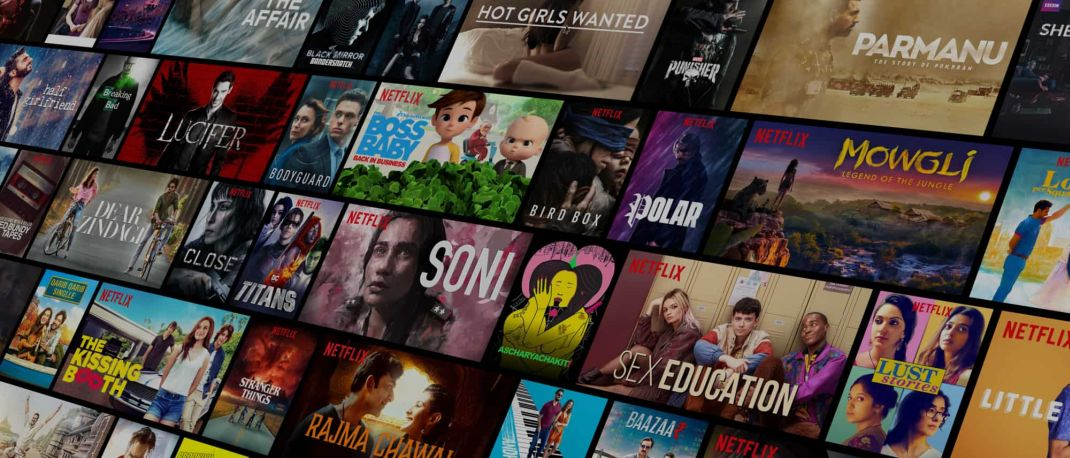

# Loading Dataset and Importing Modules**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as np

In [218]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [219]:
# Viewing the data of top 5 rows to take a glimps of the data
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [220]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [221]:

credits['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

* Merging the dataset on basis of title

In [222]:
movies=movies.merge(credits,on='title')

In [223]:
# Seeing the rows and columns of the data set
movies.shape

(4809, 23)

In [224]:
#check details about the data set
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [225]:
#Dropping the unwanted columns
movies.drop(columns=['homepage','budget','id','original_language','original_title','popularity','production_companies','production_countries','revenue','runtime','spoken_languages','status','tagline','vote_average','vote_count'],inplace=True)

In [226]:
movies.head()

,genres,keywords,overview,release_date,title,movie_id,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",2009-12-10,Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",2007-05-19,Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,2015-10-26,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,2012-07-16,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",2012-03-07,John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [227]:
#check for count of missing values in each column.
movies.isnull().sum()

genres          0
keywords        0
overview        3
release_date    1
title           0
movie_id        0
cast            0
crew            0
dtype: int64

* There are some null values but null values are less in dataset show we can drop these

In [228]:
#Dropping the null values
movies.dropna(inplace=True)

In [229]:
movies.isnull().sum()

genres          0
keywords        0
overview        0
release_date    0
title           0
movie_id        0
cast            0
crew            0
dtype: int64

In [374]:
value=movies.duplicated().sum()
print("The number of duplicated value in dataset is",value)

The number of duplicated value in dataset is 0


**Thankfully there is no duplicate value present in the dataset**

**We are trying to find all the generes,keywords and cast from the columns generes it is not present in a structured form.**

**What is ast module ??**
* The ast module in Python is a powerful tool for working with abstract syntax trees (ASTs), which represent the hierarchical structure of code in a program. It provides functionalities to parse and analyze Python source code, allowing developers to programmatically examine and manipulate code at a deeper level. The module is particularly useful for tasks such as code analysis, optimization, and transformation. By using the `ast` module, programmers can gain insights into the structure of their code, automate code modifications, and build tools that analyze and modify Python programs without the need to execute them. This module is commonly employed in code refactoring, static analysis, and various domain-specific applications requiring intricate code manipulation. *

In [231]:
# Creating function 
import ast

def converter(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

In [232]:
movies['genres']=movies['genres'].apply(converter)

In [233]:
movies.head()

,genres,keywords,overview,release_date,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",2009-12-10,Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",2007-05-19,Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,2015-10-26,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,2012-07-16,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",2012-03-07,John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [234]:
movies['keywords']=movies['keywords'].apply(converter)

In [235]:
def convert(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter != 4:
            l.append(i['name'])
            counter += 1
        else:
            break
    return l
    

In [236]:
movies['cast']=movies['cast'].apply(convert)

In [237]:
def director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            l.append(i['name'])
    return l

In [238]:
movies['crew']=movies['crew'].apply(director)

In [239]:
movies.head()

,genres,keywords,overview,release_date,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",2009-12-10,Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",2007-05-19,Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,2015-10-26,Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,2012-07-16,The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",2012-03-07,John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [240]:
# Now I am seeing the overview column and converting this from text a list
movies['overview']=movies['overview'].apply(lambda x : x.split())

In [241]:
movies.head()

,genres,keywords,overview,release_date,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",2009-12-10,Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",2007-05-19,Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...",2015-10-26,Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...",2012-07-16,The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",2012-03-07,John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


**Now I have to remove all the space from all the columns because it will create problem in further process**

In [242]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

In [243]:
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])

In [244]:
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [245]:
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [246]:
movies.head()

,genres,keywords,overview,release_date,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",2009-12-10,Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",2007-05-19,Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",2015-10-26,Spectre,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",2012-07-16,The Dark Knight Rises,49026,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",2012-03-07,John Carter,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


**Merging all the columns in one column so that we can reduce dimensionality.**

In [247]:

movies['tags']= movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [317]:
movies.tail()

,genres,keywords,overview,release_date,title,movie_id,cast,crew,tags
4804,"[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[El, Mariachi, just, wants, to, play, his, gui...",1992-09-04,El Mariachi,9367,"[CarlosGallardo, JaimedeHoyos, PeterMarquardt,...",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4805,"[Comedy, Romance]",[],"[A, newlywed, couple's, honeymoon, is, upended...",2011-12-26,Newlyweds,72766,"[EdwardBurns, KerryBishé, MarshaDietlein, Cait...",[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4806,"[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[""Signed,, Sealed,, Delivered"", introduces, a,...",2013-10-13,"Signed, Sealed, Delivered",231617,"[EricMabius, KristinBooth, CrystalLowe, GeoffG...",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,[],[],"[When, ambitious, New, York, attorney, Sam, is...",2012-05-03,Shanghai Calling,126186,"[DanielHenney, ElizaCoupe, BillPaxton, AlanRuck]",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."
4808,[Documentary],"[obsession, camcorder, crush, dreamgirl]","[Ever, since, the, second, grade, when, he, fi...",2005-08-05,My Date with Drew,25975,"[DrewBarrymore, BrianHerzlinger, CoreyFeldman,...","[BrianHerzlinger, JonGunn, BrettWinn]","[Ever, since, the, second, grade, when, he, fi..."


In [279]:
new_df=movies[['movie_id','title','tags']]

In [280]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [281]:
# Now converting tags into a string bu using join function.
new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))

C:\Users\hp\AppData\Local\Temp\ipykernel_20648\684433085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))


In [375]:
new_df.tail(5)

,movie_id,title,tags
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...
4808,25975,My Date with Drew,ever since the second grade when he first saw ...


In [283]:
new_df['tags']=new_df['tags'].apply(lambda x: x.lower())

C:\Users\hp\AppData\Local\Temp\ipykernel_20648\2543325826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: x.lower())


**What is CountVectorizer**
* sklearn.feature_extraction.text.CountVectorizer is a class provided by the scikit-learn library, which is a widely used machine learning framework in Python. This class is specifically designed for text data preprocessing and feature extraction, a crucial step in natural language processing (NLP) and text analysis tasks.

* The main purpose of CountVectorizer is to create a "bag-of-words" representation of the text data. This representation captures the frequency of words (or tokens) in each document. The resulting matrix can be used as input for machine learning models, where each row corresponds to a document, and each column corresponds to a unique word in the entire corpus. The values in the matrix indicate the count of each word in each document.


In [292]:
from sklearn.feature_extraction.text import CountVectorizer

In [293]:
cv= CountVectorizer(max_features= 5000,stop_words='english')

In [300]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [301]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [302]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

**What is Cosine Similarity ??**
* sklearn.metrics.pairwise.cosine_similarity is a function provided by the scikit-learn library, which is widely used for machine learning tasks in Python. This function is specifically designed for calculating the cosine similarity between pairs of vectors. Cosine similarity is a measure of similarity between two non-zero vectors in an n-dimensional space. It is often used in various fields, including information retrieval, natural language processing, and recommendation systems.

* When you import cosine_similarity from the sklearn.metrics.pairwise module, you gain access to a method that computes the cosine similarity between two sets of vectors. In the context of recommendation systems or text analysis, this similarity measure is commonly used to quantify how similar two items or documents are based on their feature representations.

* In the context of recommendation systems, cosine similarity can be used to identify similar items or users based on their feature vectors. For instance, in a content-based recommendation system, documents or items are represented as feature vectors (e.g., using TF-IDF values), and cosine similarity helps measure the similarity between these vectors to suggest relevant content.


In [303]:
from sklearn.metrics.pairwise import cosine_similarity

In [304]:
similarity = cosine_similarity(vectors)

In [306]:
similarity.shape

(4805, 4805)

* "Step into a world of cinematic exploration with the power of our cutting-edge movie recommendation system. Picture this: you input a movie title that intrigues you, and our sophisticated function springs into action. It elegantly navigates through our extensive dataset, scanning for that very title. Once located, the magic unfolds as our function employs a meticulously crafted similarity matrix. It measures the intricacies of each movie's essence and artistry, distilling it into a concept of cinematic kinship. Like a compass guiding you through the vast universe of film, our function selects the top 5 movies that share the closest affinity with your chosen title. It's not just a recommendation; it's a cinematic journey tailored just for you. Be prepared to be captivated, surprised, and delighted as our movie recommender unveils a curated list of films that mirror your preferences in a way that only true movie aficionados can appreciate."

In [355]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [376]:
recommend("Avatar")

(['Titan A.E.',
  'Independence Day',
  'Small Soldiers',
  'Aliens vs Predator: Requiem',
  'Battle: Los Angeles'],
 ['https://image.tmdb.org/t/p/w500//el2iHk3LTJWfEnwrvcRkvWY501G.jpg',
  'https://image.tmdb.org/t/p/w500//p0BPQGSPoSa8Ml0DAf2mB2kCU0R.jpg',
  'https://image.tmdb.org/t/p/w500//2nuUjSzHsoYlRvTPmLo7m7gCQry.jpg',
  'https://image.tmdb.org/t/p/w500//jCyJN1vj8jqJJ0vNw4hDH2KlySO.jpg',
  'https://image.tmdb.org/t/p/w500//jloyGeVYZSxM9zsLFvVOWuj2ey4.jpg'])

In [358]:
import pickle

In [360]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [362]:
pickle.dump(new_df.to_dict(),open('new_movies_dict.pkl','wb'))

In [364]:
pickle.dump(similarity,open('similarity.pkl','wb'))